<a href="https://colab.research.google.com/github/Azimoj/Classifier-automatiquement-des-biens-de-consommation/blob/main/Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install umap-learn

     |████████████████████████████████| 86 kB 3.2 MB/s 
     |████████████████████████████████| 1.1 MB 33.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=1d91cae204f5ce500547ba701a899d84c9a98f0772e4064f867ee0425731112f
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=513228ff5d5611a705930e54e4c26b87a55bc95dbe31a33d8c704020d891899b
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
# Data Structures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.image import imread

from PIL import Image, ImageOps
from sklearn import cluster, metrics
from PIL import Image, ImageOps
import time
from PIL import ImageFilter
import time, cv2

from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
flipkart= pd.read_csv('/content/drive/MyDrive/p6/flipkart_com-ecommerce_sample_1050.csv',sep=',')

In [ ]:
#create category
flipkart['category']=flipkart['product_category_tree'].str.split(
    pat=">>",expand=True)[0]
flipkart["category"] = flipkart["category"].str.replace('[', "")
flipkart["category"] = flipkart["category"].str.replace('"', "")
flipkart["category"] = flipkart["category"].str.replace(' ', "")

catg  = {'HomeFurnishing':'Home',
         'Watches':'Watches',
         'HomeDecor&FestiveNeeds':'Decor',
         'BabyCare':'Baby',
         'BeautyandPersonalCare':'Beauty',
         'Computers':'Computers',
         'Kitchen&Dining':'Kitchen'}
flipkart['category'] =[catg[i] for i in flipkart['category']]
cluster  = {'Home':0,
           'Watches':1,
           'Decor':2,
           'Baby':3,
           'Beauty':4,
           'Computers':5,
           'Kitchen':6}

y_true = flipkart['category'].map(cluster)
list_labels=flipkart["category"].unique()

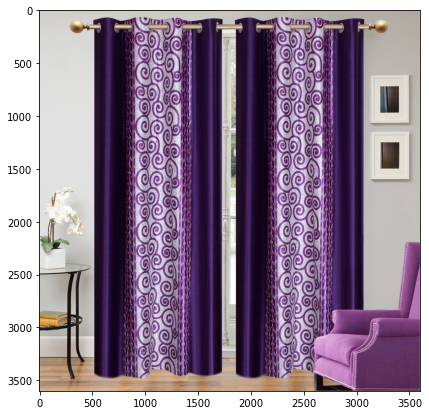

In [ ]:
from PIL import Image
path = "/content/drive/MyDrive/p6/Images/"

im = Image.open(path+flipkart.image[0])

plt.figure(figsize=(7,7))
plt.imshow(im)

Home


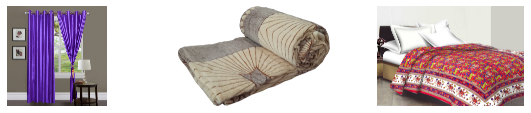

-------
Baby


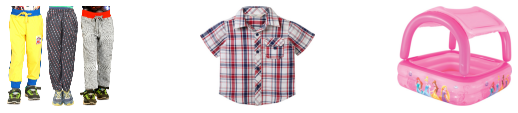

-------
Watches


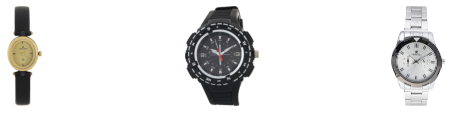

-------
Decor


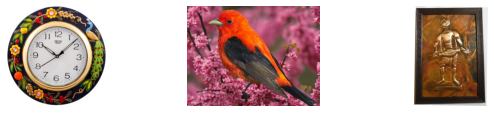

-------
Kitchen


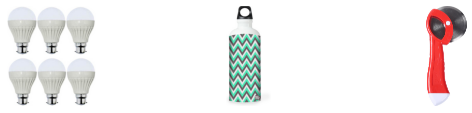

-------
Beauty


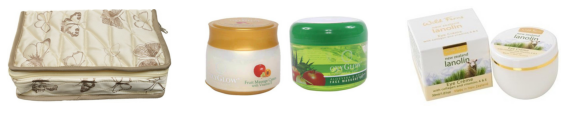

-------
Computers


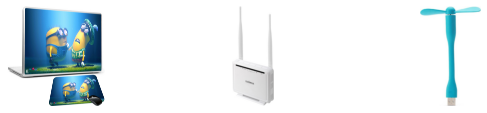

-------


In [ ]:
list_labels=flipkart["category"].unique()


for name in list_labels :
    plt.figure(figsize=(10,15))
    
    print('\033[1m' + name)
    
    for i in range(3):
        plt.subplot(7, 3, i + 1)
        for j in flipkart[flipkart["category"]==name].image.sample():
          filename = path + j
          image = imread(filename)
          plt.axis('off')
          plt.imshow(image)
         
    plt.show()
    print("-------")

The steps to be taken are :::

* Read image.
* Resize image.
* Remove noise(Denoise)
* object detection

https://prince-canuma.medium.com/image-pre-processing-c1aec0be3edf

### **Image preprocessing**

* PIL (Pyhton Imaging Library)  
* OpenCV (Open Compute Vision) 



In [ ]:
ima_id = '0ae859a69c7608d8197c3ba8c37bc6ec'

In [ ]:
from PIL import Image, ImageOps

# Chargement de l'image en mémoire
img0 = Image.open(path +ima_id+'.jpg')

# Sauvegarde de l'image sur le disque dans le répertoire images_processed
img0.save('/content/drive/MyDrive/p6/images_processed/'+ima_id+'_A_0.jpg', 'jpeg')

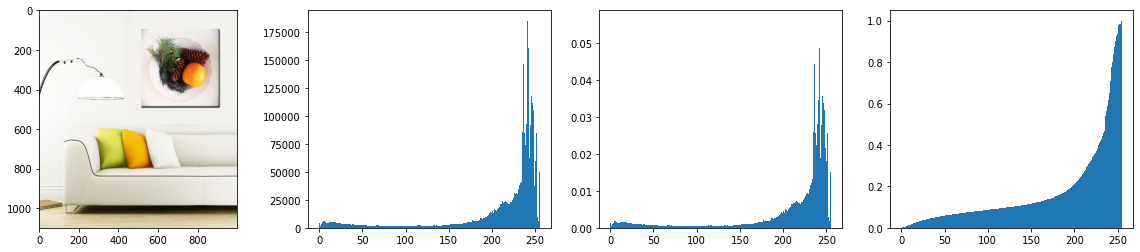

In [ ]:
# Transformation de l'image en matrice de pixels
img0_num = np.array(img0)

# Histogrammes
plt.figure(figsize=(20,4))
plt.subplot(141),plt.imshow(img0)
plt.subplot(142),plt.hist(img0_num.flatten(), bins=range(256)) # Histogramme
plt.subplot(143),plt.hist(img0_num.flatten(), bins=range(256), density=True) # Histogramme normalisé
plt.subplot(144),plt.hist(img0_num.flatten(), bins=range(256), density=True, cumulative=True) # Histogramme normalisé cumulé
plt.show()

$\color{orange}{\text{- Prétraitement des images avec PIL}}$

In [ ]:
#Conversion en niveaux de gris
gray_ = 1
if gray_ == 1:
  img1 = img0.convert('L')
elif gray_ == 0:
  img1 = img0

In [ ]:
img1_num = np.array(img1)
img1.save('/content/drive/MyDrive/p6/images_processed/'+ima_id+'_A_1.jpg', 'jpeg')

In [ ]:
from PIL import ImageFilter

# Lissage par moyennage (fenêtre de taille 9)
img2a = img1.filter(ImageFilter.BoxBlur(1))
img2a_num = np.array(img2a)
img2a.save('/content/drive/MyDrive/p6/images_processed/'+ima_id+'_A_2a.jpg', 'jpeg')

In [ ]:
# Filtre gaussien
img2b = img1.filter(ImageFilter.GaussianBlur(1))
img2b_num = np.array(img2b)
img2b.save('/content/drive/MyDrive/p6/images_processed/'+ima_id+'_A_2b.jpg', 'jpeg')

In [ ]:
# Egalisation après réduction de bruit méthode 1
img3a = ImageOps.equalize(img2a, mask = None)
img3a_num = np.array(img3a)
img3a.save('/content/drive/MyDrive/p6/images_processed/'+ima_id+'_A_3a.jpg', 'jpeg')

In [ ]:
# Egalisation après réduction de bruit méthode 2
img3b = ImageOps.equalize(img2b, mask = None)
img3b_num = np.array(img3b)
img3b.save('/content/drive/MyDrive/p6/images_processed/'+ima_id+'_A_3b.jpg', 'jpeg')

In [ ]:
# contrast
img4a = ImageOps.autocontrast(img2a)
img4a_num = np.array(img4a)
img4a.save('/content/drive/MyDrive/p6/images_processed/'+ima_id+'_A_4a.jpg', 'jpeg')

Prétraitement des images avec PIL 



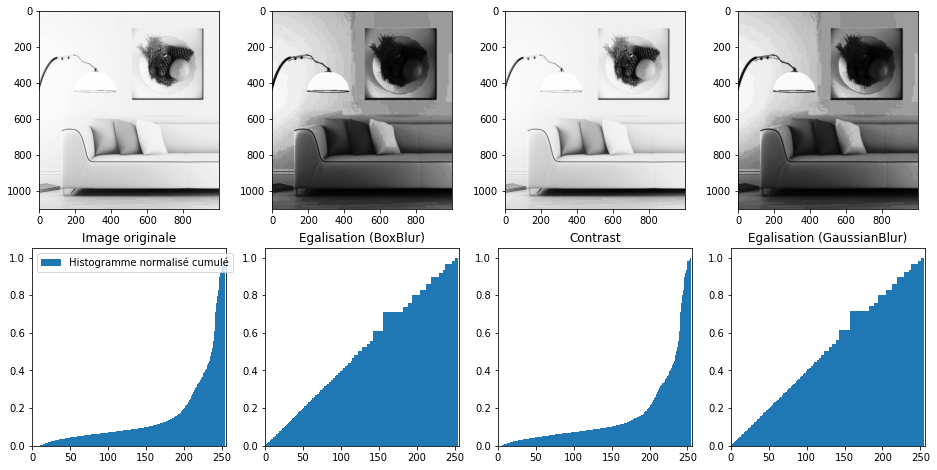

In [ ]:
print('Prétraitement des images avec PIL','\n' )
plt.figure(figsize=(16,8))


plt.subplot(241),plt.imshow(img1, cmap='gray')
plt.subplot(242),plt.imshow(img3a, cmap='gray')
plt.subplot(243),plt.imshow(img4a, cmap='gray')
plt.subplot(244),plt.imshow(img3b, cmap='gray')


plt.subplot(245),plt.hist(img1_num.flatten(), bins=range(256), density=True, cumulative=True),
plt.xlim([0,256])
plt.legend(['Histogramme normalisé cumulé'], loc = 'upper left')
plt.title('Image originale')

plt.subplot(246),plt.hist(img3a_num.flatten(), bins=range(256), density=True, cumulative=True),
plt.xlim([0,256])
plt.title('Egalisation (BoxBlur)')

plt.subplot(247),plt.hist(img4a_num.flatten(), bins=range(256), density=True, cumulative=True),
plt.xlim([0,256])
plt.title('Contrast')

plt.subplot(248),plt.hist(img3b_num.flatten(), bins=range(256), density=True, cumulative=True),
plt.xlim([0,256])
plt.title('Egalisation (GaussianBlur)')

$\color{orange}{\text{- Prétraitement des images avec OpenCV}}$

In [ ]:
import cv2
print('cv2',cv2.__version__)

cv2 4.1.2


In [ ]:
img0 = cv2.imread(path +ima_id+'.jpg') # On charge l'image en couleur en mémoire

Conversion en niveaux de gris

In [ ]:
#convert in gray
gray_ = 0

if gray_ == 1:
    img1_ = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY) # Conversion de l'image originale (couleur) en niveaux de gris
     
elif gray_ == 0:
    img1 = img0 # Image en couleur
# Display format:
       # cv2 processes images in BGR mode
    img1_ = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) # Transformation BGR --> RGB

In [ ]:
cv2.imwrite('/content/drive/MyDrive/p6/images_processed/'+ima_id+'_B_1.jpg', img1) # On sauvegarde l'image sur le disque
                                                                          # dans le répertoire images_processed

True

In [ ]:
hist,bins = np.histogram(img1.flatten(),256,[0,256])
cdf1 = hist.cumsum()
cdf1_normalized = cdf1 * hist.max() / cdf1.max()

In [ ]:

img1 = cv2.imread('/content/drive/MyDrive/p6/images_processed/'+ima_id+'_B_1.jpg',cv2.IMREAD_GRAYSCALE)


img2_ = cv2.adaptiveThreshold(img1,255,
                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C,#gaussian
                              cv2.THRESH_BINARY,15,3) # Image en niveaux de gris
        
cv2.imwrite('/content/drive/MyDrive/p6/images_processed/'+ima_id+'_B_2.jpg', img1)

True

In [ ]:
hist,bins = np.histogram(img1.flatten(),256,[0,256])
cdf2 = hist.cumsum()
cdf2_normalized = cdf2 * hist.max() / cdf2.max()

**Egalisation méthode** 

https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html

In [ ]:
#Egalisation méthode 1

img2 = cv2.imread('/content/drive/MyDrive/p6/images_processed/'+ima_id+'_B_2.jpg',0)

img3a = cv2.equalizeHist(img2)
cv2.imwrite('/content/drive/MyDrive/p6/images_processed/'+ima_id+'_B_3a.jpg', img3a)

# Après égalisation, l'image est rendue en niveaux de gris
# Les niveaux sont inversés à l'affichage
# On utilisera donc le paramètre cmap ='gray' pour rétablir les niveaux

True

In [ ]:
hist,bins = np.histogram(img3a.flatten(),256,[0,256])
cdf3a = hist.cumsum()
cdf3a_normalized = cdf3a * hist.max() / cdf3a.max()

In [ ]:
# Egalisation méthode 2

img2 = cv2.imread('/content/drive/MyDrive/p6/images_processed/'+ima_id+'_B_2.jpg',0)

# On créé un objet CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(3,3))
img3b = clahe.apply(img2)
cv2.imwrite('/content/drive/MyDrive/p6/images_processed/'+ima_id+'_B_3b.jpg', img3b)

True

In [ ]:
hist,bins = np.histogram(img3b.flatten(),256,[0,256])
cdf3b = hist.cumsum()
cdf3b_normalized = cdf3b * hist.max() / cdf3b.max()

Prétraitement des images avec OpenCV 



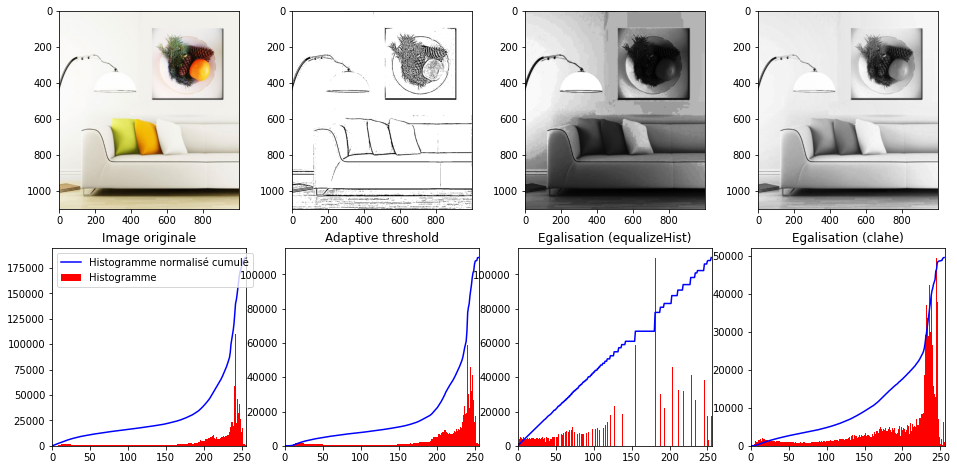

In [ ]:
print('Prétraitement des images avec OpenCV','\n')

plt.figure(figsize=(16,8))

if gray_ == 1: 
    plt.subplot(241),plt.imshow(img1_, cmap='gray') # Image affichée en niveaux de gris inversés, on la redresse avec cmap
    plt.subplot(242),plt.imshow(img2_, cmap='gray')
    plt.subplot(243),plt.imshow(img3a, cmap='gray') 
    plt.subplot(244),plt.imshow(img3b, cmap='gray') 

elif gray_ == 0:
    plt.subplot(241),plt.imshow(img1_) # Image affichée en RGB
    plt.subplot(242),plt.imshow(img2_, cmap='gray') 
    plt.subplot(243),plt.imshow(img3a, cmap='gray') 
    plt.subplot(244),plt.imshow(img3b, cmap='gray')
    
plt.subplot(245)
plt.plot(cdf1_normalized,color='b')
plt.hist(img1.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.legend(('Histogramme normalisé cumulé','Histogramme'), loc = 'upper left')
plt.title('Image originale')

plt.subplot(246)
plt.plot(cdf2_normalized,color='b')
plt.hist(img2.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.title('Adaptive threshold')

plt.subplot(247)
plt.plot(cdf3a_normalized,color='b')
plt.hist(img3a.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.title('Egalisation (equalizeHist)')

plt.subplot(248)
plt.plot(cdf3b_normalized,color='b')
plt.hist(img3b.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.title('Egalisation (clahe)')

plt.show()

**Feature detection**

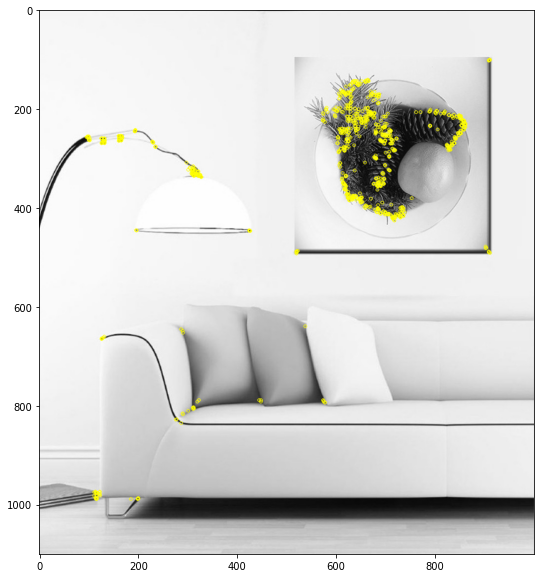

Descripteurs :  (1000, 32)

[[ 30 251 114 ... 247  47 213]
 [ 21  86  91 ... 145 101 236]
 [218 114 206 ... 196 171 219]
 ...
 [ 34 253  59 ...  26  39 251]
 [154 158 230 ... 244 165 221]
 [  0 133  26 ...  74 161 130]]


In [ ]:
#Feature detection (SIFT, SURF, ORB)

#https://docs.opencv.org/4.x/d1/d89/tutorial_py_orb.html
#https://medium.com/@shehan.a.perera/a-comparison-of-sift-surf-and-orb-333d64bcaaea

orb = cv2.ORB_create(1000)
#sift=cv2.SIFT_create()

kp, des = orb.detectAndCompute(img2, None)
img=cv2.drawKeypoints(img2, kp, img2, color=(255, 255, 0))
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)


### Applying both of mathodes on all the images

In [ ]:
def resize_pil(im, target_width, target_height):       # Resize PIL image keeping ratio and using white background. 

    target_ratio = target_height / target_width
    im_ratio = im.height / im.width

    if target_ratio > im_ratio:
        # It must be fixed by width
        resize_width = target_width
        resize_height = int(resize_width * im_ratio)
    else:
        # Fixed by height
        resize_height = target_height
        resize_width = int(resize_height / im_ratio)

    image_resize = im.resize((resize_width, resize_height), Image.ANTIALIAS)
    background = Image.new('RGBA', (target_width, target_height), (255, 255, 255, 255))
    offset = (int((target_width - resize_width) / 2), int((target_height - resize_height) / 2))
    background.paste(image_resize, offset)
    return background.convert('RGB')

In [ ]:
def process_pil(image_num):

    img_orig = Image.open(path+image_num).convert('L')                      # download image
    
    img = img_orig.filter(ImageFilter.GaussianBlur(radius=3))  #Gaussian blur filter.
    img = ImageOps.autocontrast(img)                           # Auto-contrast
    img = ImageOps.equalize(img)                               # Egalisation de l'histogramme
    img = img.filter(ImageFilter.BoxBlur(1))                   # Lissage pour eliminer le bruit
        
    img = resize_pil(img, 224,224)                        # Resize en 224*224
    img=np.array(img)

    return img_orig, img

In [ ]:
def resize_cv2(img, size):                 # resize the images opencv

  h, w = img.shape[:2]
  sh, sw = size
#https://chadrick-kwag.net/cv2-resize-interpolation-methods/

  # interpolation method
  if h > sh or w > sw:                # shrinking image
      interp = cv2.INTER_AREA

  else:                               # stretching image
      interp = cv2.INTER_CUBIC

  # aspect ratio of image
  aspect = float(w)/h 
  saspect = float(sw)/sh

  if (saspect > aspect) or ((saspect == 1) and (aspect <= 1)):           # new horizontal image
      new_h = sh
      new_w = np.round(new_h * aspect).astype(int)
      pad_horz = float(sw - new_w) / 2
      pad_left, pad_right = np.floor(pad_horz).astype(int),np.ceil(pad_horz).astype(int)
      pad_top, pad_bot = 0, 0

  elif (saspect < aspect) or ((saspect == 1) and (aspect >= 1)):           # new vertical image
      new_w = sw
      new_h = np.round(float(new_w) / aspect).astype(int)
      pad_vert = float(sh - new_h) / 2
      pad_top, pad_bot = np.floor(pad_vert).astype(int), np.ceil(pad_vert).astype(int)
      pad_left, pad_right = 0, 0

  # scale and pad
  scaled_img = cv2.resize(img, (new_w, new_h), interpolation=interp)
  scaled_img = cv2.copyMakeBorder(scaled_img, 
                                  pad_top, pad_bot, pad_left, pad_right,
                                  borderType=cv2.BORDER_CONSTANT, value=255)#color white

  return scaled_img

In [ ]:
 def process_cv2(img_index): 

  image = cv2.imread(path+img_index,cv2.IMREAD_GRAYSCALE)           # convert in gray
  img = resize_cv2(image, (224,224))                               # Resize en 224*224
  img = cv2.equalizeHist(img)                                       # equalize image histogram

  img = cv2.adaptiveThreshold(img, 255,
                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C,       #gaussian
                              cv2.THRESH_BINARY,15,3)
  
  # create a CLAHE object (Arguments are optional). used to improve contrast in images
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(3,3))
  img = clahe.apply(img)
  return image,img

In [ ]:
data_pic=flipkart[['image','category']]

In [ ]:
data_pic[data_pic['image'] == '4a4ccd1ac291cfc8b3894e691a1c0f7a.jpg']

image category
528  4a4ccd1ac291cfc8b3894e691a1c0f7a.jpg  Watches

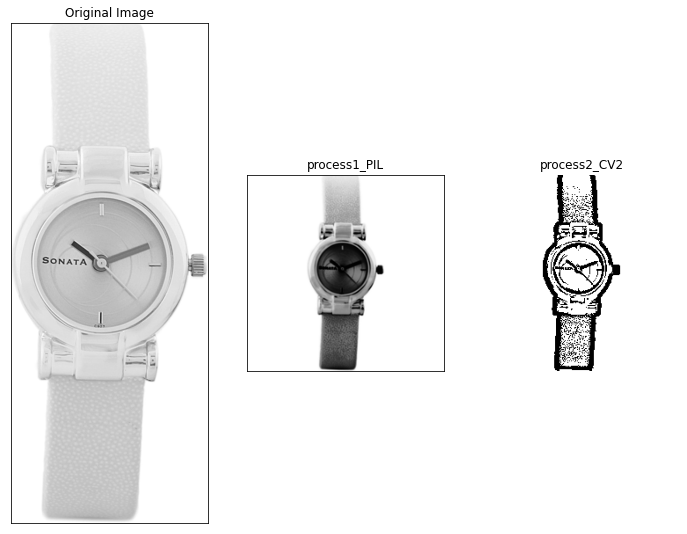

In [ ]:
index=528

img_orig, img = process_pil(data_pic.image[index])
img_orig, img_cv2 = process_cv2(data_pic.image[index])

titles = ['Original Image', 'process1_PIL','process2_CV2']
images = [img_orig, img, img_cv2]
plt.figure(figsize=(12,12))

for i in range(3):

    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.axis('off')
plt.show()

**Process with PIL**

Home


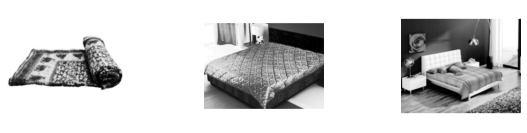

Baby


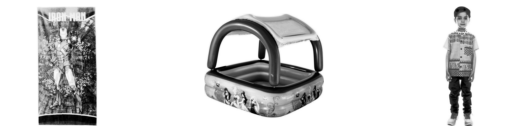

Watches


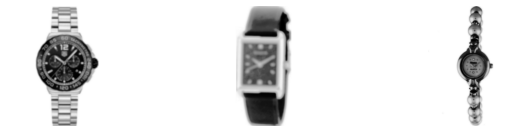

Decor


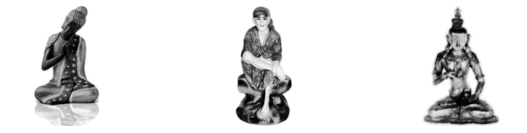

Kitchen


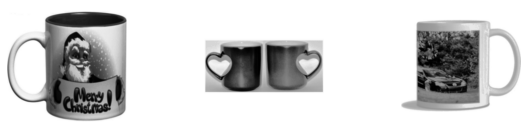

Beauty


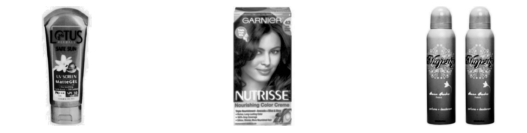

Computers


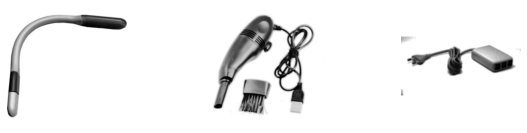

In [ ]:
for name in list_labels :
    print('\033[1m' + name)
    # print("-------")
    plt.figure(figsize=(10,18))
    for i in range(3):
      
      plt.subplot(7, 3, i + 1)
      for j in flipkart[flipkart["category"]==name].image.sample(3):

          img,cl1 = process_pil(j)
          plt.axis('off')
          plt.imshow(cl1,'gray')       
    plt.show()

In [ ]:
# Extraction of points of interest (Keypoints) and descriptors

def get_descriptors(model, process, nbr_model):
  des_list  = []
  descriptors = np.array([])

  for image_num in data_pic['image']:

        #preprocessing for image
        img_orig, img = process(image_num)

        # returns descriptors of an image
        #https://www.youtube.com/watch?v=USl5BHFq2H4&t=387s
        kp, des = model.detectAndCompute(img, None)   # model: ORB, SIFT, SURF
        
        desc = [np.zeros((nbr_model,))] if des is None else des  #Return a new array of given shape and type, filled with zeros.
        
        if len(descriptors) == 0:
          descriptors = np.array(desc)
        else:
          descriptors = np.vstack((descriptors, desc))  #Stack arrays in sequence vertically (row wise).
        # Keep track of which image a descriptor belongs to
        des_list.append(desc)
  descriptors = np.asarray(descriptors) 
  return descriptors, des_list

In [ ]:
#https://medium.com/@aybukeyalcinerr/bag-of-visual-words-bovw-db9500331b2f
#https://www.youtube.com/watch?v=a4cFONdc6nc

def BOVW(descriptors, des_list):
  k = int(round(np.sqrt(len(descriptors)),0))
  print("Number of clusters estimated : ", k)
  print("Creation of",k, "clusters ...")

  # Clustering
  #https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html
  mini_batch = MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=40)
  mini_batch.fit(descriptors)

  # Calculate the histogram of features and represent them as vector
  im_features = np.zeros((len(data_pic['image']), k), "float32")
  for i in range(len(data_pic['image'])):
      des = des_list[i]
      words=mini_batch.predict(des)
      for w in words:
          im_features[i][w] += 1
  return im_features

In [ ]:
from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.manifold import TSNE
# https://towardsdatascience.com/tsne-vs-umap-global-structure-4d8045acba17
#https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

def reduction(im_features):

  umap= UMAP(n_components= 2, init='random', random_state=0)
  proj_umap = umap.fit_transform(im_features)

  pca = PCA(n_components= 80)
  feat_pca= pca.fit_transform(im_features)

  Tsne = TSNE(n_components= 2, init='pca', random_state=0)
  proj_tsne = Tsne.fit_transform(im_features)
  return proj_umap, feat_pca, proj_tsne

In [ ]:
def evaluation(model, process, nbr_model):
  #get descriptor
  descriptors, des_list = get_descriptors(model, process, nbr_model)

  #bag of visual word
  im_features = BOVW(descriptors, des_list)
  
  #reduction of dimension
  proj_umap, feat_pca, proj_tsne= reduction(im_features)
  return im_features, proj_umap, feat_pca, proj_tsne

In [ ]:
from sklearn import cluster, metrics
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans

def ARI_labels(feats,y_true):
  #Applying standardisation on training feature
  feature_std= StandardScaler().fit_transform(feats)
  cls = cluster.KMeans(n_clusters=7,init ='random', max_iter= 100, n_init=5, random_state=40)
  
  km_mat= cls.fit_transform(feature_std)
  labels= cls.labels_
  ari= metrics.adjusted_rand_score(y_true, labels)
  return labels, ari, km_mat

In [ ]:
orb = cv2.ORB_create(1000)

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html

# Perform k-means clustering and vector quantization
from sklearn.cluster import MiniBatchKMeans

temps1=time.time()
# Perform k-means clustering and vector quantization
im_features, proj_umap, feat_pca, proj_tsne = evaluation(orb, process_pil, 32)
duration1=time.time()-temps1
print("traitement kmeans times : ", "%15.2f" % duration1, "secondes")

Number of clusters estimated :  794
Creation of 794 clusters ...
traitement kmeans times :           422.14 secondes


In [ ]:
#from sklearn import manifold, decomposition

print("Dimensions dataset before reduction PCA : ", im_features.shape)
print("Dimensions dataset after reduction PCA : ", feat_pca.shape)

Dimensions dataset before reduction PCA :  (1050, 794)
Dimensions dataset after reduction PCA :  (1050, 80)


In [ ]:
matrix=[im_features, proj_umap, feat_pca, proj_tsne]
ari_list=[]
for mat in matrix:
  labels, ari,km_mat=ARI_labels(mat,y_true)
  ari_list.append(ari)


In [ ]:
df_ari= pd.DataFrame([ari_list],
                    columns=['cluster_km','cluster_umap_km','cluster_pca_km','cluster_tsne_km',],
                    index=['ARI_SCORE_PIL'])

In [ ]:
df_ari

cluster_km  cluster_umap_km  cluster_pca_km  cluster_tsne_km
ARI_SCORE_PIL    0.060656         0.025069        0.036722         0.029674

Text(0, 0.5, 'ARI Score')

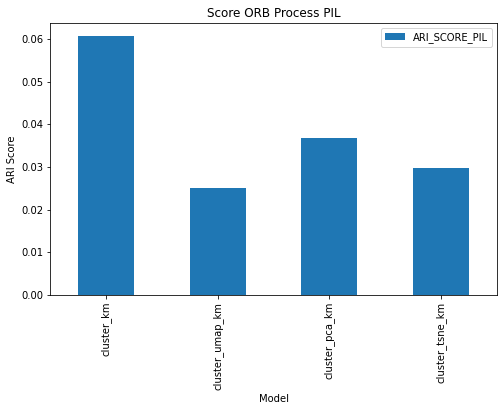

In [ ]:
df_ari.T.round(4).plot(kind="bar",figsize=(8,5))
plt.title("Score ORB Process PIL")
plt.xlabel("Model")
plt.ylabel("ARI Score")

In [ ]:
# Visualize with : ACP, TSNE, UMAP
def projection(im_features, feat_pca, proj_tsne,proj_umap, label_):
      
    fig, ax = plt.subplots(1, 3, figsize=(18,6))
    tsne_ = TSNE(n_components = 2, random_state=42, init='pca',# reduce to  PCA components, before t-SNE
             ).fit_transform(im_features)
    ax[0].scatter(tsne_[:, 0], tsne_[:, 1], c=label_)
    ax[0].set_xlabel('TSNE_1', fontsize=12)
    ax[0].set_ylabel('TSNE_2', fontsize=12)
    ax[0].set_title('tSNE', fontsize=17)
    ax[0].grid(True)

    ax[1].scatter(feat_pca[:, 0], feat_pca[:, 1], c=label_)
    ax[1].set_xlabel('PCA_1', fontsize=12)
    ax[1].set_ylabel('PCA_2', fontsize=12)
    ax[1].set_title('PCA', fontsize=17)
    ax[1].grid(True)

    ax[2].scatter(proj_umap[:, 0], proj_umap[:, 1], c=label_)
    ax[2].set_xlabel('UMAP_1', fontsize=12)
    ax[2].set_ylabel('UMAP_2', fontsize=12)
    ax[2].set_title('UMAP', fontsize=17)
    ax[2].grid(True)

    plt.legend(label_) 
    plt.tight_layout()
    plt.show()

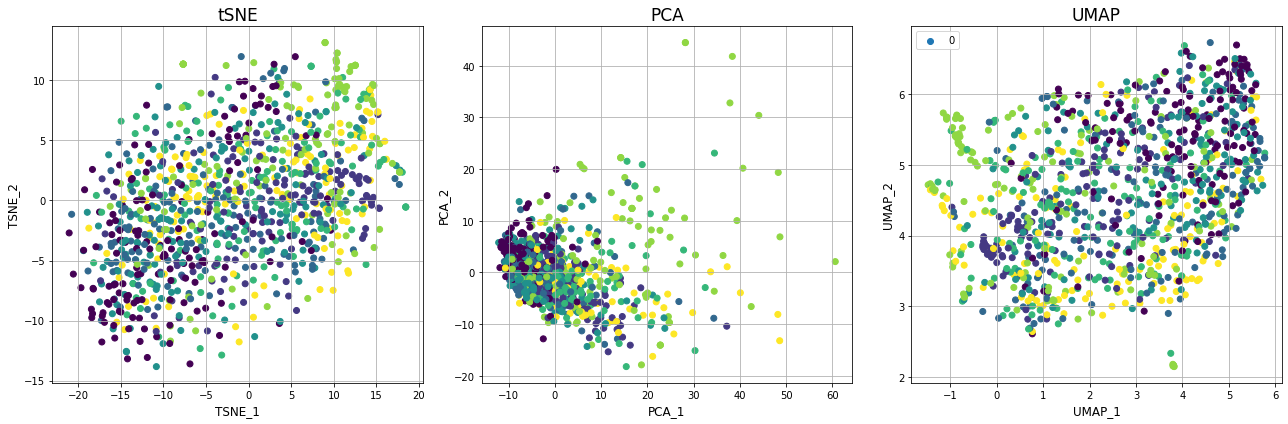

In [ ]:
projection(im_features, feat_pca, proj_tsne, proj_umap, y_true)

**Process with openCV**

Home


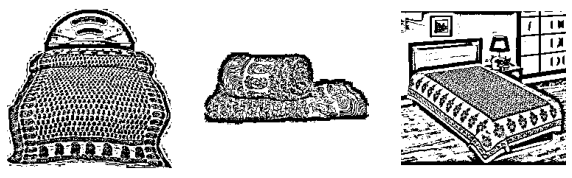

Baby


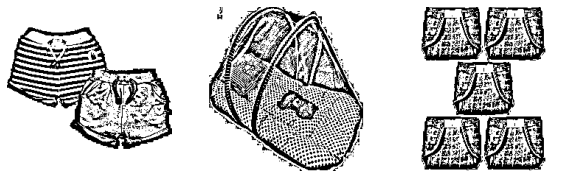

Watches


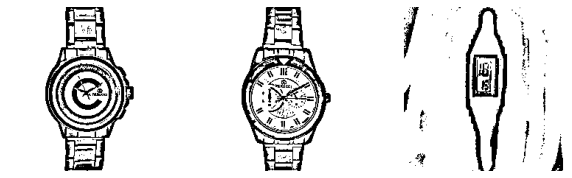

Decor


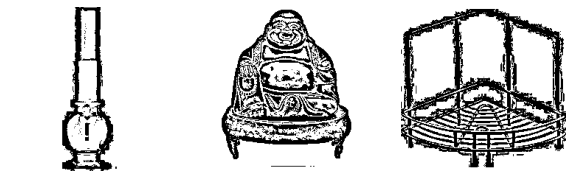

Kitchen


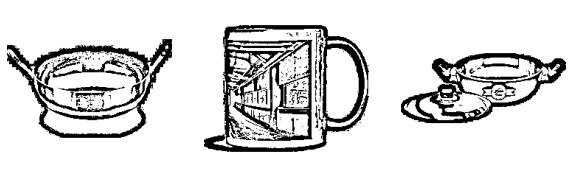

Beauty


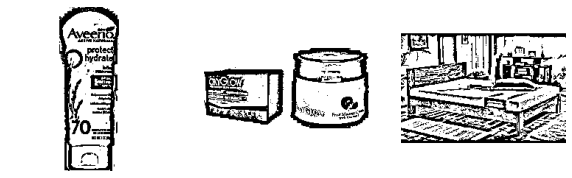

Computers


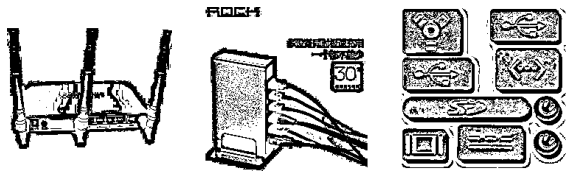

In [ ]:
for name in list_labels :
    print(name)
    # print("-------")
    plt.figure(figsize=(10,18))
    for i in range(3):
        plt.subplot(130 + 1 + i)
        for j in flipkart[flipkart["category"]==name].image.sample(3):

          img,cl1=process_cv2(j)
          plt.axis('off')
          plt.imshow(cl1,'gray')       
    plt.show()

In [ ]:
temps1= time.time()
# # Perform k-means clustering and vector quantization
im_features2, proj_umap2,feat_pca2, proj_tsne2 = evaluation(orb, process_cv2, 32)
duration1 = time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Number of clusters estimated :  906
Creation of 906 clusters ...
temps de traitement kmeans :            80.35 secondes


In [ ]:
#from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features2.shape)
print("Dimensions dataset après réduction PCA : ", feat_pca2.shape)

Dimensions dataset avant réduction PCA :  (1050, 906)
Dimensions dataset après réduction PCA :  (1050, 80)


In [ ]:
matrix=[im_features2, proj_umap2, feat_pca2, proj_tsne2]
ari_list=[]
for mat in matrix:
  labels, ari, km_mat = ARI_labels(mat, y_true)
  ari_list.append(ari)

In [ ]:
df_ari=pd.DataFrame([ari_list],
                    columns=['cluster_km','cluster_umap_km', 'cluster_pca_km','cluster_tsne_km'],
                    index=['ARI_SCORE_CV2'])

In [ ]:
df_ari

cluster_km  cluster_umap_km  cluster_pca_km  cluster_tsne_km
ARI_SCORE_CV2    0.048597         0.051679        0.010592         0.050271

Text(0, 0.5, 'ARI Score')

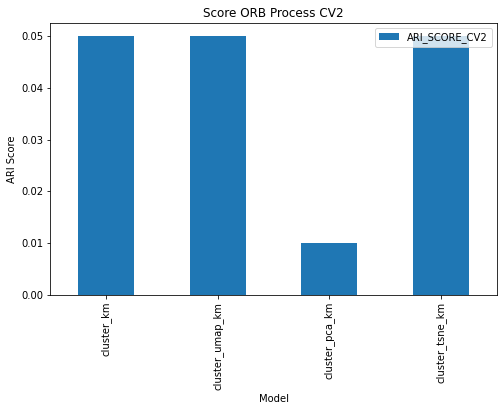

In [ ]:
df_ari.T.round(2).plot(kind="bar",figsize=(8,5))
plt.title("Score ORB Process CV2")
plt.xlabel("Model")
plt.ylabel("ARI Score")

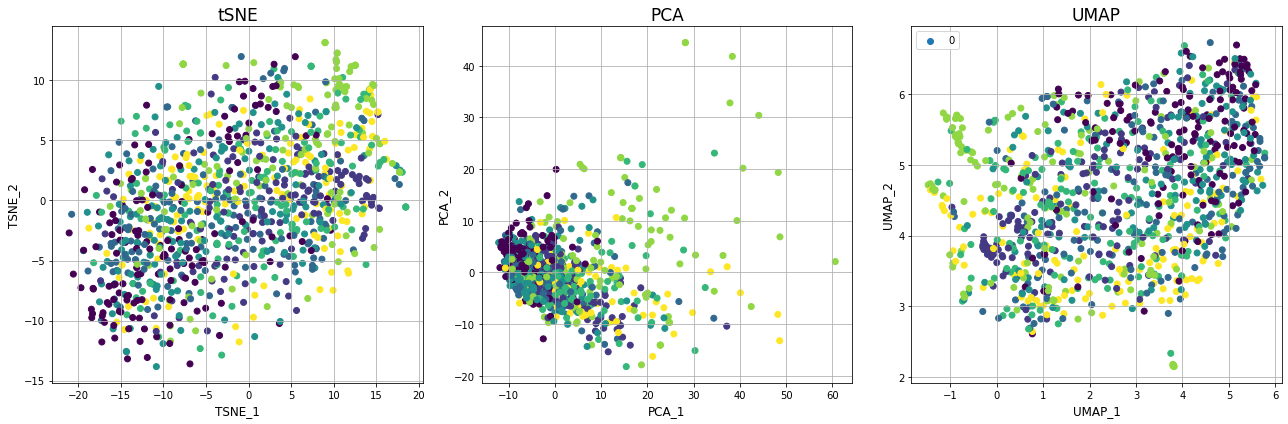

In [ ]:
projection(im_features2,feat_pca2,proj_tsne2,proj_umap2,y_true)

## Models for Transfer Learning

In [ ]:
#pip install Keras-Applications

     |████████████████████████████████| 50 kB 3.9 MB/s 


In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Model

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import resnet50

from tensorflow.keras.applications.resnet50 import ResNet50 
from keras.applications.resnet_v2 import ResNet50V2
#from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception

from keras.applications.vgg16 import preprocess_input as ppss_vgg
from keras.applications.xception import preprocess_input as ppss_xce
from tensorflow.keras.applications.resnet50 import preprocess_input as ppss_resnet
from keras.applications.inception_v3 import preprocess_input as ppss_incep
from keras.applications.resnet_v2 import preprocess_input as ppss_restv2


In [ ]:
#https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/
#Feature extraction
def get_features(model_name, data_preprocessor, input_size, data):
    '''
    1- Create a feature extractor to extract features from the data.
    2- Returns the extracted features and the feature extractor.
    '''
    #Prepare pipeline.
    input_layer = Input(input_size)
    preprocessor = Lambda(data_preprocessor)(input_layer)
    base_model = model_name(weights='imagenet', include_top=False, input_shape=input_size)(preprocessor)

    avg = GlobalAveragePooling2D()(base_model)
    feature_extractor = Model(inputs = input_layer, outputs = avg)

    #Extract feature.
    feature_maps = feature_extractor.predict(data, batch_size=64, verbose=1)
    print('Feature maps shape: ', feature_maps.shape)
    return feature_maps

In [ ]:
data_pic.head(2)

image category
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg     Home
1  7b72c92c2f6c40268628ec5f14c6d590.jpg     Baby

In [ ]:
  # Function to Extract features from the images
#from keras.layers import BatchNormalization, Dense, GlobalAveragePooling2D, Lambda, Dropout, InputLayer, Input
from keras.preprocessing import image

def image_extract_feature(direc, preprocess, model, h, w):
    features = [];

    # extract features from each photo
    for name in data_pic['image']:
        # load an image from file
        img = Image.open(path + name) # Lecture de l'image
        img = resize_pil(img, h, w) # Resize en 224*224
        
        # get features
        x = image.img_to_array(img)  #  convert the image pixels to a numpy array
        x = np.expand_dims(x, axis=0) # used to expand the shape of an array. Insert a new axis that will appear at the axis position in the expanded array shape.
        x = preprocess(x)

        resnet_feature = model.predict(x)
        resnet_feature_np = np.array(resnet_feature)
        features.append(resnet_feature_np.flatten())
    #features_np = np.array(features)
  
    return features

In [ ]:
#https://www.youtube.com/watch?v=zBOavqh3kWU

# load the model
model_vgg16 = VGG16(include_top=False, weights="imagenet", input_shape=(224,224,3))

model_restnet50 = ResNet50(include_top=False, weights="imagenet", input_shape=(224,224,3))

model_xception = Xception(include_top=True, weights="imagenet", input_shape=(299,299,3), classifier_activation="softmax")

model_inceptionV3 = InceptionV3(include_top=True,weights="imagenet", classifier_activation="softmax")

model_restnet_v2 = ResNet50V2(include_top=False, weights="imagenet", input_shape=(299,299,3),
                         input_tensor=None, classes=1000, classifier_activation='softmax')

94683136/94668760 [==============================] - 0s 0us/step


In [ ]:
def reduce(feature):
    umap= UMAP(n_components=3, init='random',random_state=15)
    proj_umap = umap.fit_transform(feature)

    pca = PCA(n_components= 80, random_state=15)
    feat_pca= pca.fit_transform(feature)

    Tsne = TSNE(n_components=3, init='random',random_state=15)
    proj_tsne = Tsne.fit_transform(feature)

    return proj_umap, feat_pca, proj_tsne

In [ ]:
def ari_model(features):
  proj_umap, feat_pca, proj_tsne = reduce(features)
  matrix=[proj_umap, feat_pca, proj_tsne]
  ARI=[]
  for mat in matrix:
    kmeans = KMeans(n_clusters=7, algorithm= 'auto', init= 'k-means++', random_state=15, max_iter=100, n_init=10).fit(mat)
    labels1 = kmeans.labels_
    ari = metrics.adjusted_rand_score(y_true, labels1)
    ARI.append(ari)
  return ARI

**VGG16**

In [ ]:
temps1 =time.time()
# # Perform k-means clustering and vector quantization
features_vgg16 = image_extract_feature(path, ppss_vgg, model_vgg16, 224, 224)
duration1 = time.time()-temps1
print("temps de calculation de VGG16 : ", "%15.2f" % duration1, "secondes")

temps de calculation de VGG16 :           644.35 secondes


In [ ]:
ARI_vgg = ari_model(features_vgg16)
ARI_vgg

[0.26004584240636275, 0.119871781247226, 0.24142454582731707]

**ResNet50**

In [ ]:
temps1 =time.time()
# Perform k-means clustering and vector quantization
features_restnet50= image_extract_feature(path, ppss_resnet, model_restnet50, 224, 224)
duration5 = time.time()-temps1
print("temps de calculation de VGG16 : ", "%15.2f" % duration5, "secondes")

temps de calculation de VGG16 :           343.44 secondes


In [ ]:
ARI_res = ari_model(features_restnet50)
ARI_res

[0.3321620935907553, 0.3253090791243263, 0.3488223633626378]

**Xception**

In [ ]:
temps1 =time.time()
# # Perform k-means clustering and vector quantization
features_xception=image_extract_feature(path, ppss_xce, model_xception,299,299)
duration5 = time.time()-temps1
print("temps de calculation de xception : ", "%15.2f" % duration5, "secondes")

temps de calculation de xception :           501.15 secondes


In [ ]:
ARI_xpec=ari_model(features_xception)
ARI_xpec

[0.23201995275190082, 0.08576497812019729, 0.389219716779399]

**InceptionV3**

In [ ]:
temps1 =time.time()
# # Perform k-means clustering and vector quantization
features_inceptionV3 = image_extract_feature(path, ppss_incep, model_inceptionV3,299,299)
duration5 = time.time()-temps1
print("temps de calculation de xception : ", "%15.2f" % duration5, "secondes")

temps de calculation de xception :           392.13 secondes


In [ ]:
ARI_incepV3=ari_model(features_inceptionV3)
ARI_incepV3

[0.2164470024055007, 0.06302569990483707, 0.35675907934552237]

**InceptionResNetV2**

In [ ]:
temps1 =time.time()
# # Perform k-means clustering and vector quantization
features_resV2= image_extract_feature(path, ppss_restv2, model_restnet_v2, 299, 299)
duration5 = time.time()-temps1
print("temps de calculation de inception : ", "%15.2f" % duration5, "secondes")

In [ ]:
ARI_resV2= ari_model(features_resV2)
ARI_resV2

[0.31892678346245623, 0.2322297896585109, 0.31122879614021365]

## Evaluation

In [ ]:
comp_ari=pd.DataFrame([ARI_vgg, ARI_res, ARI_xpec, ARI_incepV3, ARI_resV2]
                    ,columns=['proj_umap','feat_pca', 'proj_tsne'],
                    index=['VGG16','ResNet50', 'Xception','InceptionV3','ResNet50V2'])

In [ ]:
comp_ari.round(2)

proj_umap  feat_pca  proj_tsne
VGG16             0.26      0.12       0.24
ResNet50          0.33      0.33       0.35
Xception          0.23      0.09       0.39
InceptionV3       0.22      0.06       0.36
ResNet50V2        0.32      0.23       0.31

Text(0, 0.5, 'ARI Score')

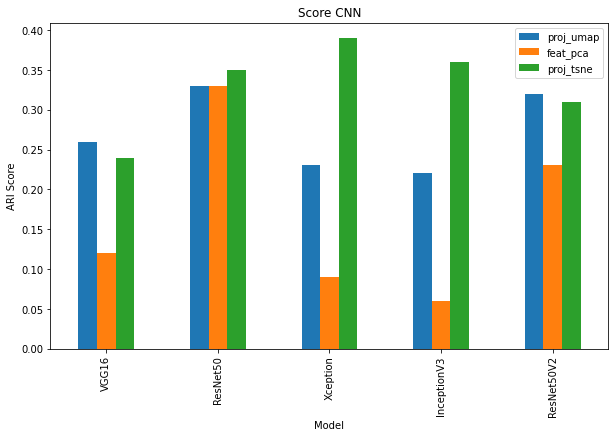

In [ ]:
comp_ari.round(2).plot(kind="bar",figsize=(10,6))
plt.title("Score CNN")
plt.xlabel("Model")
plt.ylabel("ARI Score")

## Analyse des clusters

In [ ]:
from sklearn.metrics import make_scorer,adjusted_rand_score
from sklearn.model_selection import GridSearchCV

km=KMeans(n_clusters=7)
score= make_scorer(adjusted_rand_score)

parameters = {'init':('k-means++', 'random'),
              'max_iter':[50,100,120],
              'n_init':[5,10,15],
              'algorithm':['auto', 'full', 'elkan'],
              'random_state': [20,25,30,40,60,]}

tsne = TSNE(n_components=2)
tsne_matrix = tsne.fit_transform(features_xception)

# Grid search
grid = GridSearchCV(km, parameters, scoring=score)
grid.fit(tsne_matrix, y_true)
index_grid=grid.cv_results_['rank_test_score'].tolist().index(1)
print("ARI score mean :"+ str(grid.cv_results_['mean_test_score'][index_grid]))
print("Best parameters: "+ str(grid.best_params_))

ARI score mean :0.4990120819671242
Best parameters: {'algorithm': 'auto', 'init': 'random', 'max_iter': 50, 'n_init': 15, 'random_state': 20}


In [ ]:
tsne = TSNE(n_components=2)
tsne_matrix = tsne.fit_transform(features_xception)

kmeans = KMeans(n_clusters=7, algorithm='auto', init= 'random', max_iter=50, n_init= 15, random_state=20).fit(tsne_matrix)
labels_ts = kmeans.labels_

In [ ]:
round(metrics.adjusted_rand_score(y_true, labels_ts), 2)

0.45

In [ ]:
def plot_tsne_pca(matrix, title, labels):

# Dimensionality reduction using PCA,
    # reduce the tfidf matrix to just 2 features

    pca = PCA(n_components= 2, random_state=5).fit_transform(matrix)
    tsne = TSNE(n_components= 2, random_state=5).fit_transform(matrix)  

    #attaching the label to each 2D projection
    pca_data = np.vstack((pca.T,labels)).T
    pca_df = pd.DataFrame(pca_data, columns=['pca-one','pca-two','category'])

    tsne_data = np.vstack((tsne.T,labels)).T
    tsne_df = pd.DataFrame(tsne_data, columns=['tsne-one','tsne-two','category'])
   
    #idx = np.random.choice(range(pca.shape[0]),  size=500, replace=False)
    f, ax = plt.subplots(1, 2, figsize=(14, 6))

    sns.scatterplot(data=pca_df, x="pca-one", y="pca-two", hue='category',ax=ax[0])
    ax[0].set_title('PCA Cluster Plot'+' '+title)
    
    sns.scatterplot(data=tsne_df, x="tsne-one", y="tsne-two", hue='category', ax=ax[1])
    ax[1].set_title('TSNE Cluster Plot'+' '+title)

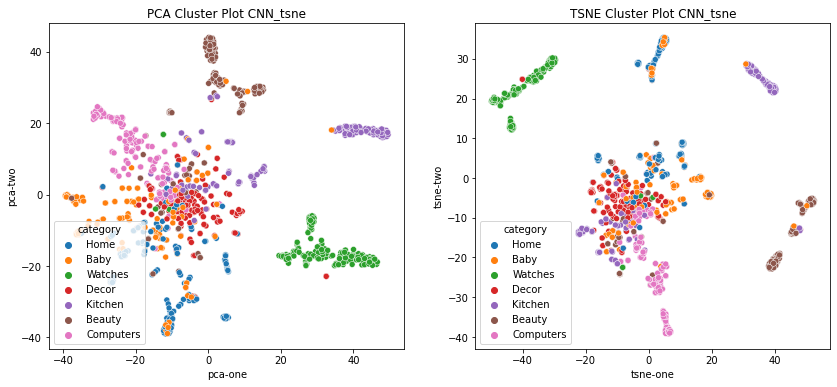

In [ ]:
plot_tsne_pca(tsne_matrix,'CNN_tsne',data_pic['category'])

In [ ]:
data_pic['cluster_tsne']= labels_ts
metrics.confusion_matrix(y_true, data_pic['cluster_tsne'])

array([[ 71,   0,  46,  17,   0,   0,  16],
       [  0, 145,   1,   3,   0,   0,   1],
       [ 13,   4,   6,   6,   0,   1, 120],
       [ 13,   0, 103,   3,   1,   2,  28],
       [  3,   0,  10,  12,   0, 103,  22],
       [  1,   0,   2, 119,   0,   0,  28],
       [  0,   0,   0,   4,  71,   3,  72]])

In [ ]:
np.argmax(metrics.confusion_matrix(y_true, data_pic['cluster_tsne']), axis=0)

array([0, 1, 3, 5, 6, 4, 2])

In [ ]:
conf_mat =metrics.confusion_matrix(y_true, data_pic['cluster_tsne'])
corresp = np.argmax(conf_mat, axis=0)
labels = pd.Series(y_true, name="y_true").to_frame()

labels['y_pred_transform'] = data_pic['cluster_tsne'].apply(lambda x : corresp[x])


conf_mat = metrics.confusion_matrix(y_true, labels['y_pred_transform'])
conf_mat

array([[ 71,   0,  16,  46,   0,  17,   0],
       [  0, 145,   1,   1,   0,   3,   0],
       [ 13,   4, 120,   6,   1,   6,   0],
       [ 13,   0,  28, 103,   2,   3,   1],
       [  3,   0,  22,  10, 103,  12,   0],
       [  1,   0,  28,   2,   0, 119,   0],
       [  0,   0,  72,   0,   3,   4,  71]])

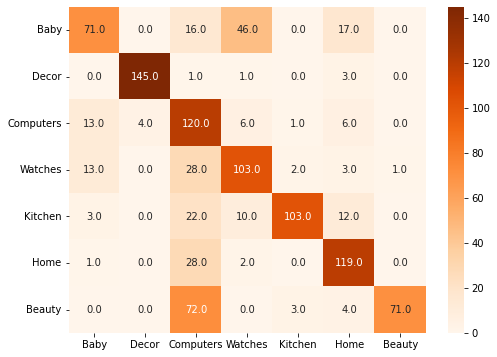

In [ ]:
list_labels=['Baby','Decor','Computers','Watches','Kitchen','Home','Beauty']
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels], columns = [label for label in list_labels])
plt.figure(figsize = (8,6))
sns.heatmap(df_cm, annot=True, fmt='.1f', cmap="Oranges")

In [ ]:
cluster

{0: 'Home',
 1: 'Watches',
 2: 'Decor',
 3: 'Baby',
 4: 'Beauty',
 5: 'Computers',
 6: 'Kitchen'}

In [ ]:
data_pic.tail(10)

image category  cluster_tsne
1040  3b465b02720ef7c930cb2e065a8fc05d.jpg     Baby             6
1041  b1644f47c7dfa58f8c06677f2a27ee09.jpg     Baby             0
1042  057836ecde71565f8ebdd576e41fdc96.jpg     Baby             0
1043  38782cce965307ddcdbedfcb7fa409c3.jpg     Baby             3
1044  be0f39341d771aac57084970f1ed6425.jpg     Baby             6
1045  958f54f4c46b53c8a0a9b8167d9140bc.jpg     Baby             0
1046  fd6cbcc22efb6b761bd564c28928483c.jpg     Baby             6
1047  5912e037d12774bb73a2048f35a00009.jpg     Baby             6
1048  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg     Baby             0
1049  f2f027ad6a6df617c9f125173da71e44.jpg     Baby             6

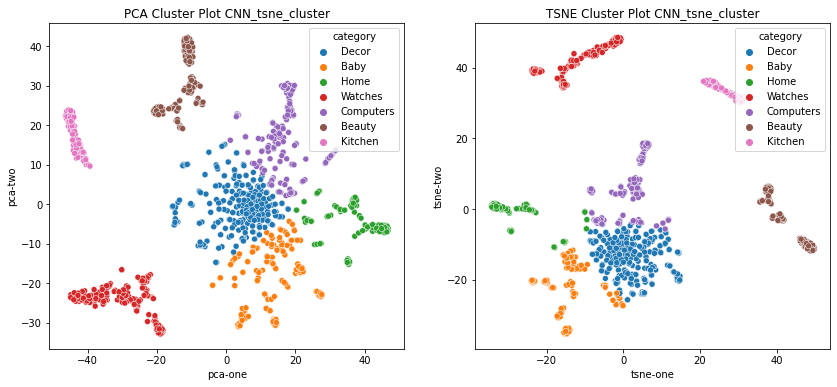

In [ ]:
cluster  = {0: 'Home',
            1: 'Watches',
            2: 'Decor',
            3: 'Baby',
            4: 'Beauty',
            5: 'Computers',
            6: 'Kitchen'}

labels_transform = labels['y_pred_transform'].map(cluster)
plot_tsne_pca(tsne_matrix,'CNN_tsne_cluster', labels_transform)

In [ ]:
data_pic['cluster_tsne']= labels_transform

Decor


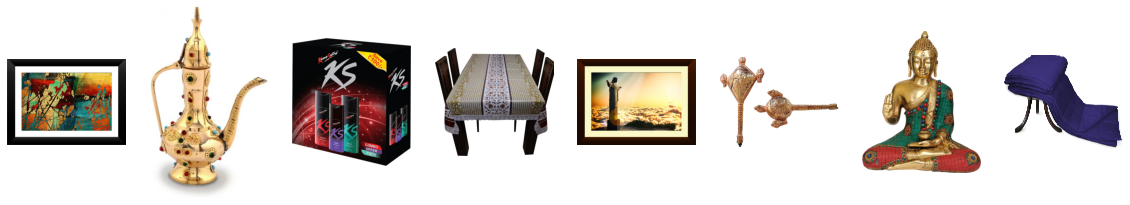

-------
Baby


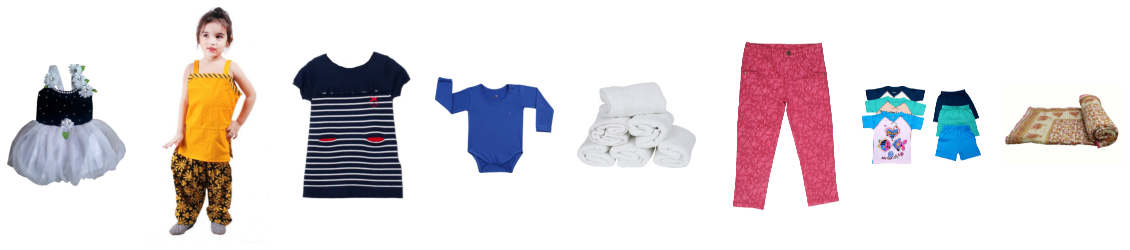

-------
Home


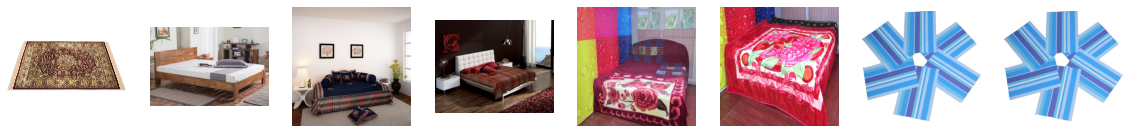

-------
Watches


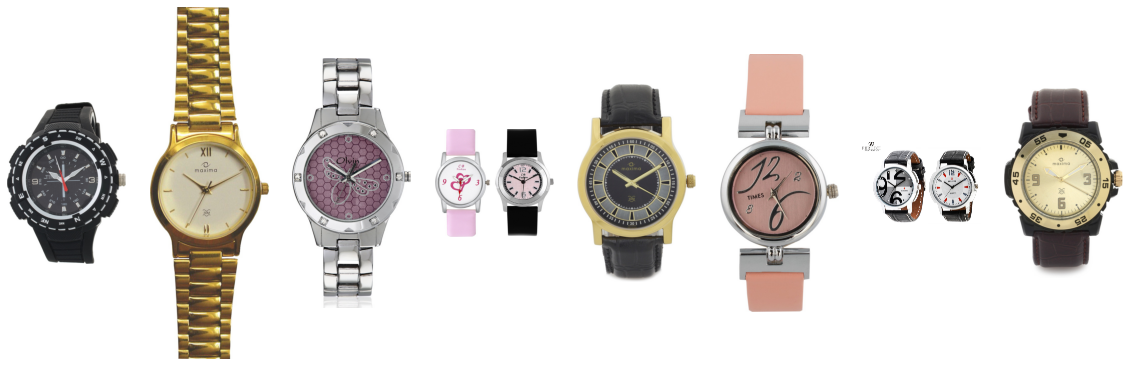

-------
Computers


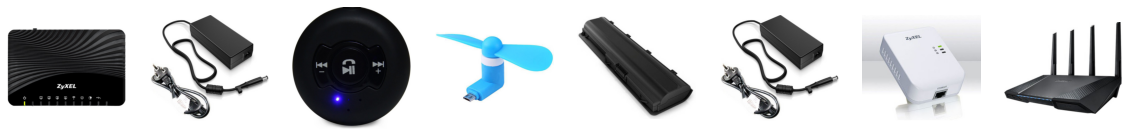

-------
Beauty


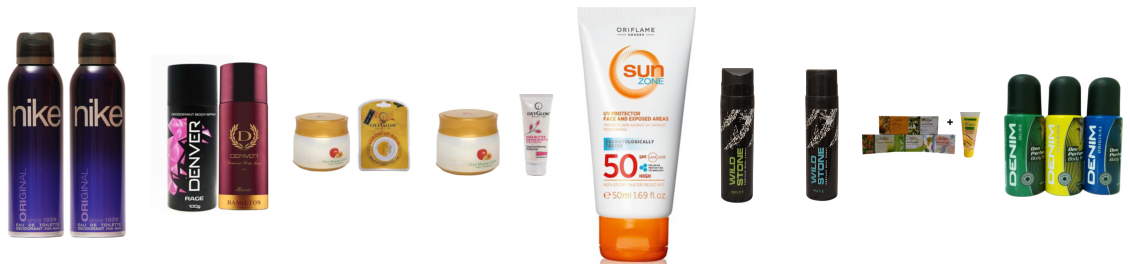

-------
Kitchen


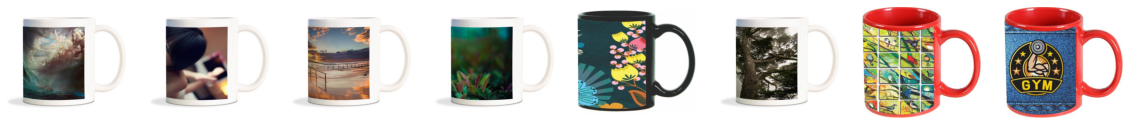

-------


In [ ]:
list_labels= data_pic['cluster_tsne'].unique()
path = "/content/drive/MyDrive/p6/Images/"

#plt.figure(figsize=(12,12))
for name in list_labels :
    plt.figure(figsize=(20,10))

    print(name)
    # print("-------")
    for i in range(8):
        plt.subplot(180 + 1 + i)
        for j in data_pic[data_pic['cluster_tsne']==name].image.sample(3):
          filename = path + j
          image = imread(filename)
          plt.axis('off')
          plt.imshow(image)
    plt.show()
    print("-------")

## Test évaluation

In [ ]:
from PIL import Image
from random import *

path = "/content/drive/MyDrive/p6/Images/"
def test(index):
    im = Image.open(path+ flipkart.image[index])
    print('Name:  ',flipkart['product_name'].iloc[index])
    print('categorie: ',data_pic['category'].iloc[index])

    print('cluster: ',data_pic.cluster_tsne.iloc[index])

    plt.figure(figsize=(7,7))
    plt.imshow(im)

Name:   Elegance Polyester Multicolor Abstract Eyelet Door Curtain
categorie:  Home
cluster:  Decor


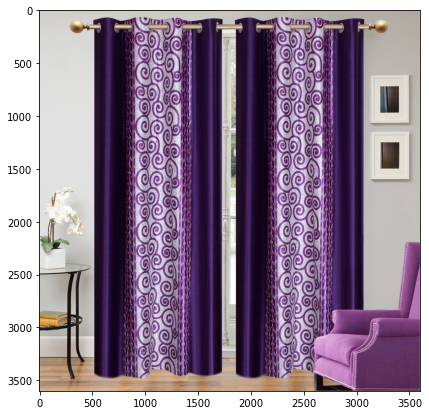

In [ ]:
test(0)

Name:   Nike Original Combo Set
categorie:  Beauty
cluster:  Beauty


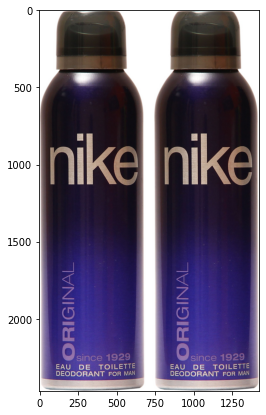

In [ ]:
test(377)

Name:   Elite Collection Medium Acrylic Sticker
categorie:  Baby
cluster:  Decor


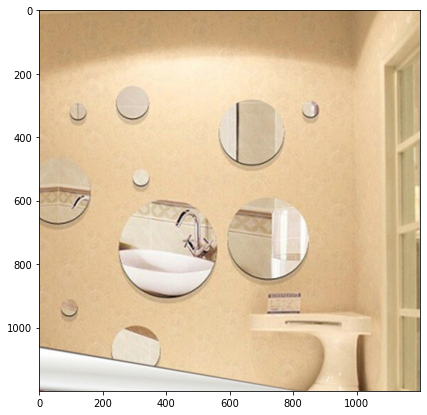

In [ ]:
test(1040)

Name:   Intex Kids Inflatable Air Chair
categorie:  Baby
cluster:  6


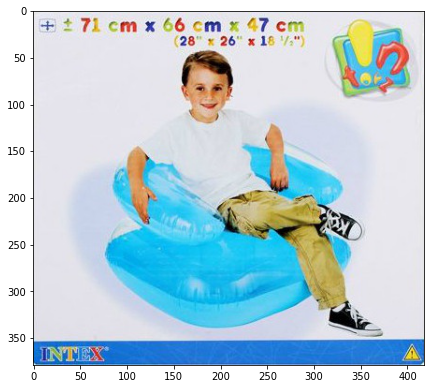

In [ ]:
test(889)

Name:   Filink 310 Black Toner
categorie:  Computers
cluster:  Decor


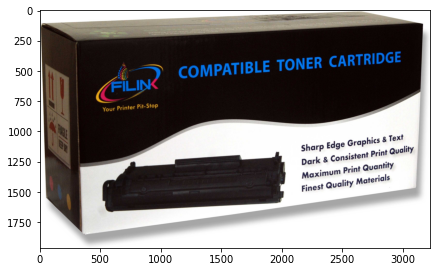

In [ ]:
test(115)